In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas


def ecdf(data: list, bins=None):
    bins_ = 1
    if bins is None:
        bins = np.sort([min(data), max(data)] + data)
        bins_ = None
    his_vals, base = np.histogram(data, bins=bins)
    cumulative = np.cumsum(his_vals)
    if bins_ is None:
        return base, cumulative / max(cumulative)
    else:
        return base, (cumulative - 1) / (len(data) - 1)

In [2]:
figS8_data = scipy.io.loadmat("figS8.mat", simplify_cells=True)

# Fig8.A

In [3]:
data_frame = {"Single-qubit gate": [], "Pauli error": []}
for q_name, pauli_error in figS8_data["pauli_error_sq_smt_avg"].items():
    data_frame["Single-qubit gate"].append(q_name)
    data_frame["Pauli error"].append(np.round(pauli_error * 1000, 2))
dp = pandas.DataFrame(data_frame)
display(dp)

,Single-qubit gate,Pauli error
0,q3_5,0.48
1,q7_5,0.45
2,q11_5,0.47
3,q11_7,0.34
4,q1_7,0.45
5,q1_9,0.79
6,q5_9,0.72
7,q7_9,0.58
8,q11_9,0.60
9,q1_5,0.60


In [4]:
data_frame = {"Two-qubit CZ gate": [], "Pauli error": []}
for q_name, pauli_error in figS8_data["pauli_error_cz_cavg"].items():
    data_frame["Two-qubit CZ gate"].append(q_name)
    data_frame["Pauli error"].append(np.round(pauli_error * 1000, 1))
dp = pandas.DataFrame(data_frame)
display(dp)

,Two-qubit CZ gate,Pauli error
0,c2_5,6.9
1,c6_5,8.1
2,c10_7,4.8
3,c7_8,8.6
4,c5_8,3.8
5,c2_7,5.1
6,c2_9,7.0
7,c10_9,3.4
8,c10_5,10.8
9,c11_8,4.4


# Fig8.B

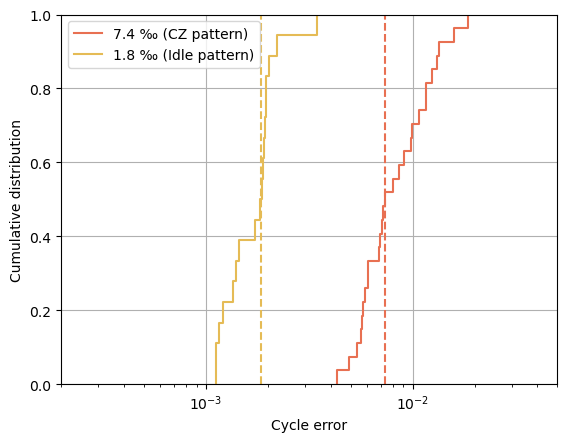

In [5]:
cycle_error_cz = list(figS8_data["cycle_error_cz_cavg"].values())
cycle_error_idle = list(figS8_data["cycle_error_idle_qavg"].values())
base, steps = ecdf(cycle_error_cz)
plt.step(
    base[1:],
    steps,
    color="#e87052",
    label="{:.1f} ‰ (CZ pattern)".format(np.median(cycle_error_cz) * 1000),
)
plt.semilogx([np.median(cycle_error_cz)] * 2, [0, 1], "--", color="#e87052")
base, steps = ecdf(cycle_error_idle)
plt.step(
    base[1:],
    steps,
    color="#e5bb55",
    label="{:.1f} ‰ (Idle pattern)".format(np.median(cycle_error_idle) * 1000),
)
plt.semilogx([np.median(cycle_error_idle)] * 2, [0, 1], "--", color="#e5bb55")

plt.grid()
plt.ylim([0, 1.0])
plt.xlim([2e-4, 5e-2])
plt.ylabel("Cumulative distribution")
plt.xlabel("Cycle error")
plt.legend()